In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set = dataset_train.iloc[:, 1: 2].values

In [4]:
training_set.shape

(1509, 1)

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train.shape

(1449, 60)

In [8]:
y_train.shape

(1449,)

In [9]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape

(1449, 60, 1)

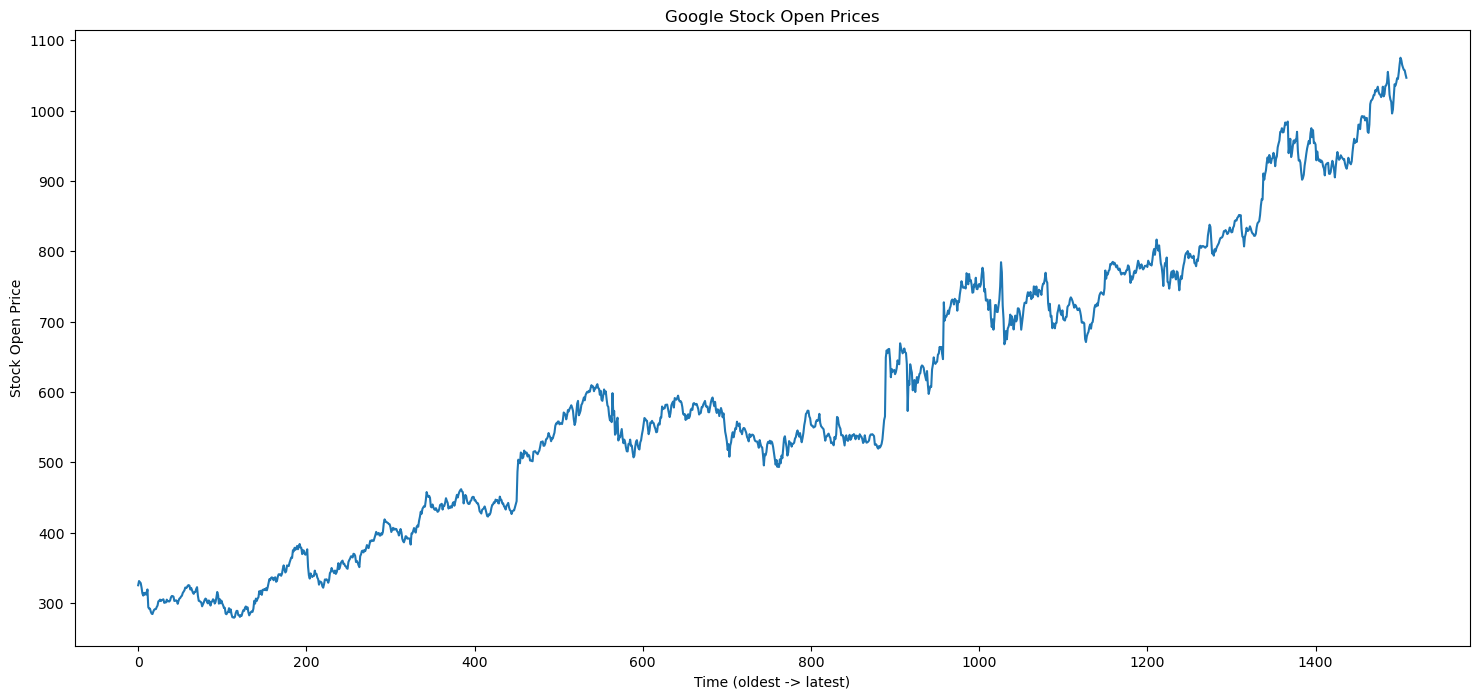

In [11]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

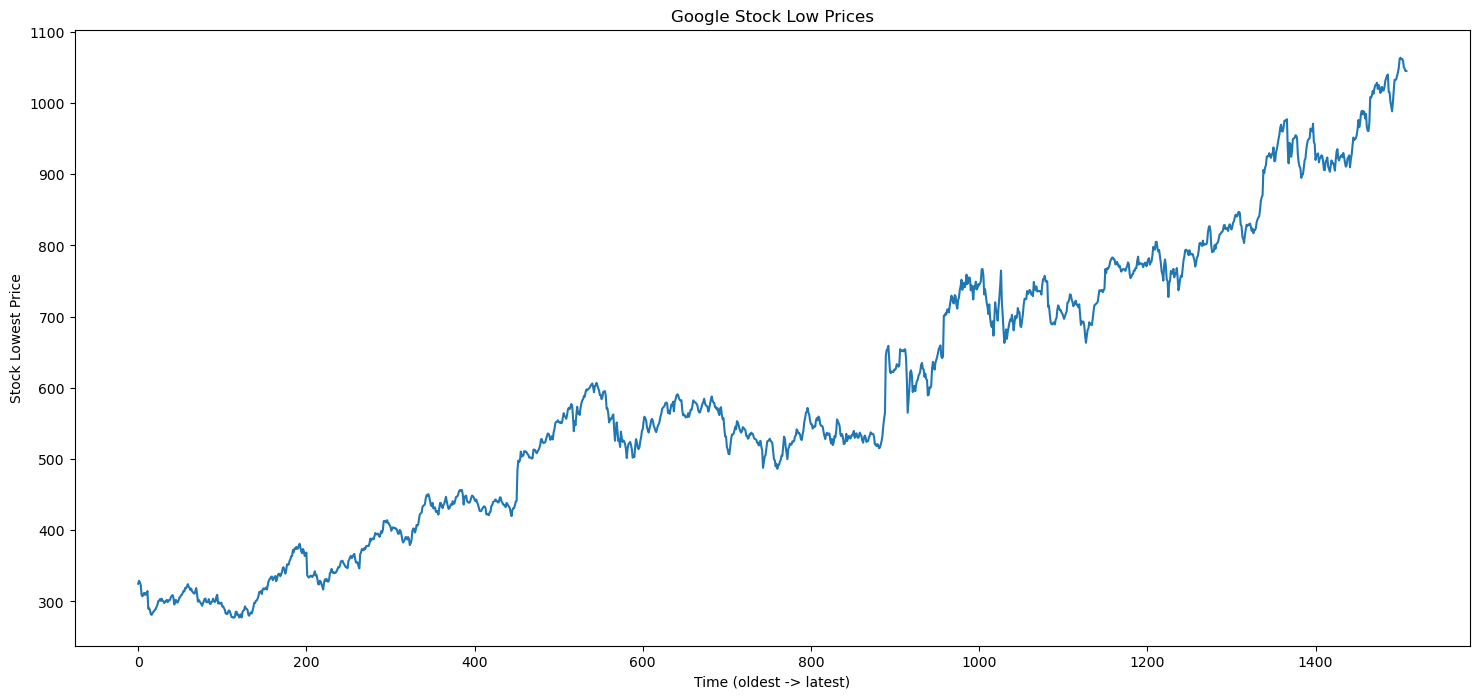

In [12]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [13]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 50)

Epoch 1/50
46/46 [==============================] - 13s 79ms/step - loss: 0.0208
Epoch 2/50
46/46 [==============================] - 4s 77ms/step - loss: 0.0037
Epoch 3/50
46/46 [==============================] - 4s 82ms/step - loss: 0.0040
Epoch 4/50
46/46 [==============================] - 4s 82ms/step - loss: 0.0035
Epoch 5/50
46/46 [==============================] - 4s 81ms/step - loss: 0.0032
Epoch 6/50
46/46 [==============================] - 4s 78ms/step - loss: 0.0032
Epoch 7/50
46/46 [==============================] - 4s 80ms/step - loss: 0.0030
Epoch 8/50
46/46 [==============================] - 4s 80ms/step - loss: 0.0030
Epoch 9/50
46/46 [==============================] - 4s 80ms/step - loss: 0.0027
Epoch 10/50
46/46 [==============================] - 4s 85ms/step - loss: 0.0023
Epoch 11/50
46/46 [==============================] - 4s 78ms/step - loss: 0.0027
Epoch 12/50
46/46 [==============================] - 4s 82ms/step - loss: 0.0025
Epoch 13/50
46/46 [=================

In [30]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [31]:
dataset_test.head()

Date         Open         High          Low        Close   Volume
0  02/01/2018  1048.339966  1066.939941  1045.229980  1065.000000  1237600
1  03/01/2018  1064.310059  1086.290039  1063.209961  1082.479980  1430200
2  04/01/2018  1088.000000  1093.569946  1084.001953  1086.400024  1004600
3  05/01/2018  1094.000000  1104.250000  1092.000000  1102.229980  1279100
4  08/01/2018  1102.229980  1111.270020  1101.619995  1106.939941  1047600

In [32]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [34]:
inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

In [35]:
len(inputs)

185

In [36]:
X_test = []
for i in range(60, len(inputs)):
     X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [37]:
X_test.shape

(125, 60, 1)

In [41]:
predicted_stock_price = regressor.predict(X_test)


4/4 [==============================] - 0s 27ms/step


In [42]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

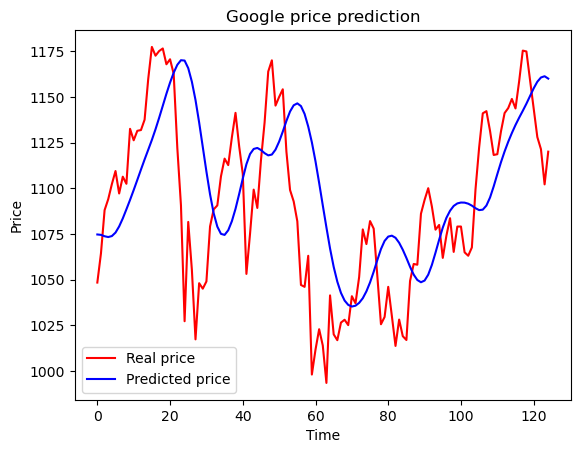

In [40]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()